**Tworzenie danych**

In [0]:
pip install Pillow

In [0]:
from PIL import Image     #importowanie różnych ciekawych rzeczy
import glob
import cv2
import numpy as np
from matplotlib import pyplot as plt
from random import randint
import math
import os

#glob.glob('G://TEST TEST TEST/*')
#glob.glob('G://TEST TEST TEST/Dataset V1.0')
#glob.glob('G://TEST TEST TEST/test/')

In [3]:
blank_image = np.zeros((1000,1000,3), np.uint8)  #tworzenie pustego obrazka
blank_image[:,:] = (255,255,255)

plt.imshow(blank_image)

NameError: ignored

In [0]:
def add_circle(image, size, circle_db = 0, count_border = 0):   #dodawanie kółek do obrazka: obrazek, rozmiar obrazka, spis kół wygenerowanych na tym obrazku, czy liczyć ze ścianą czy nie
  
  x = float(size[0])
  y = float(size[1])
  
  rngx = randint(int(x*0.05),int(x*0.95))  #oś X
  rngy = randint(int(y*0.05),int(y*0.95))  #oś Y
  rngrad = randint(60,200) #promień koła    
  rngb = randint(20,255)   #kolory
  rngr = randint(20,255)
  rngg = randint(20,255)
  rnghole = randint(20,180) #rozmiar ściany
  
  if circle_db != 0:        #sprawdzanie czy dziury w kółkach na siebie zachodzą tylko jeśli są już jakies koła 
    for circle in circle_db:
      if count_border == 0:
        
        if pow((rngrad + circle[2]),2) > (pow(abs(rngx - circle[0]), 2) + pow(abs(rngy - circle[1]), 2)):   # (r koła1 + r koła2) ^ 2 > (x koła 1 + x koła 2) ^ 2 + (y koła 1 + y koła 2) ^ 2, czy na siebie nachodzą
          return(add_circle(image, size, circle_db))    
        
      elif count_border == 1:
        
        if pow((rngrad + circle[2] + rnghole + circle[3]),2) > (pow(abs(rngx - circle[0]), 2) + pow(abs(rngy - circle[1]), 2)): #to, co wyżej, ale dodatkowo sprawdzanie nachodzenia ścian
          return(add_circle(image, size, circle_db))  
        
      else:
        
        return(print("Sprawdź parametry funkcji"))
        
 
        
      
        
  
  cv2.circle(image,(rngx,rngy), rngrad, (rngb,rngr,rngg), rnghole) #dodawanie koła do obrazka z wcześniej wygenerowanych liczb
  plt.imshow(image)
  
  return([image, [rngx, rngy, rngrad, rnghole]])                   #zwraca ([obrazek z dodanym kołem, [liczby opisujące to koło]])  

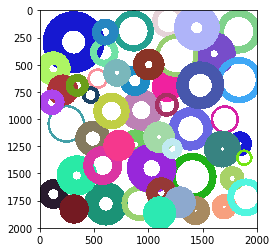

In [18]:
def create_image(circle_number = 1, bg_color = [255,255,255], size = [2000,2000], count_border = 0):    #tworzy obrazek z określoną ilością kółek. (ilość kół, kolor tła, rozmiar tła, czy liczyć ścianę)
  blank_image = np.zeros((size[0],size[1],3), np.uint8)                 #tworzenie obrazka
  blank_image[:,:] = (bg_color[0],bg_color[1],bg_color[2])        #zmiana koloru tła
  db = []
  
  
  
  while circle_number > 0:            #pętla tworząca obrazek o określonej ilości kółek: 
    
    circle_number -= 1
    img = add_circle(blank_image, size, db, count_border)
    db.append(img[1])
    
  return(blank_image)
  
sample = create_image(50, count_border = 0)

In [0]:
def create_dataset(save_path, image_number = 1, max_circle_number = 5, bg_color = [255,255,255], size = [2000,2000], count_border = 0):  #tworzy zbiór obrazków z kółkami w 
  info = []                                                              #określonym miejscu, o określonej ilości obrazków 
  while image_number > 0:                                                #i o określonej maksymalnej ilości kółek 
    
    circle_number = randint(1, max_circle_number)
    img = create_image(circle_number, bg_color, size, count_border)
    res = cv2.resize(img, dsize=(255, 255), interpolation=cv2.INTER_CUBIC)
    cv2.imwrite(str(save_path[0]) + "circles"+str(image_number)+".jpg", res)
    info.append(str("circles"+str(image_number)+".jpg")+";"+str(circle_number))
    image_number -= 1
    
  info_file = open(str(save_path[0])+"info.txt", "w")
  
  for inf in info[::-1]:
    
    info_file.write(inf)
    info_file.write("\n")
    
  info_file.close()
    
    
create_dataset(glob.glob('G://TEST TEST TEST/2check/'), 100, 2)

In [28]:
xd = [1,2,3]
float(xd[2])*0.5

1.5